In [1]:
# Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import statsmodels.formula.api as sm_formula
import statsmodels.api as sm
from scipy import stats
import scipy
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Check that the sum of squares of N(0,1) follows a chi-square distribution

In [2]:
m=5000 # samples of N(0,1)
n=7   # degrees of freedom

In [3]:
sample = np.random.normal(0, 1, m*n).reshape(m,n)
sample2 = sample*sample

count    5000.000000
mean        6.983337
std         3.694727
min         0.506779
25%         4.231516
50%         6.399403
75%         8.972933
max        32.253752
dtype: float64

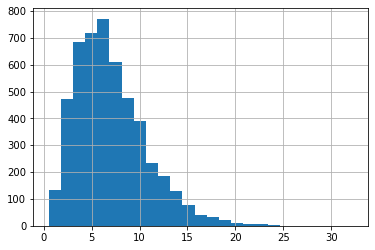

In [4]:
sums = sample2.sum(axis=1)
pd.Series(sums).hist(bins=25)
pd.Series(sums).describe()

count    5000.000000
mean        7.011383
std         3.690871
min         0.458216
25%         4.244969
50%         6.372626
75%         9.065205
max        27.844128
dtype: float64

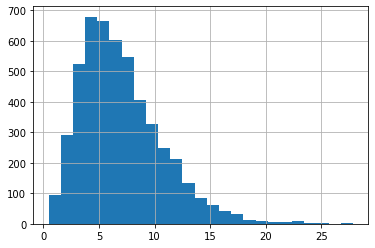

In [5]:
sample3 = np.random.chisquare(n,m)
pd.Series(sample3).hist(bins=25)
pd.Series(sample3).describe()

### Check that from the ratio of a z distribution and the root of a chi-square distribution we obtain a t distribution

In [6]:
m=5000 # samples of N(0,1)
n=7   # degrees of freedom

In [7]:
samplez = np.random.normal(0, 1, m)
samplechi2 = np.random.chisquare(n,m)
samplechi2n = np.sqrt(np.random.chisquare(n,m)/n)
t = samplez / samplechi2n

count    5000.000000
mean       -0.020900
std         1.186481
min        -7.295399
25%        -0.747463
50%        -0.022648
75%         0.683989
max         6.672230
dtype: float64

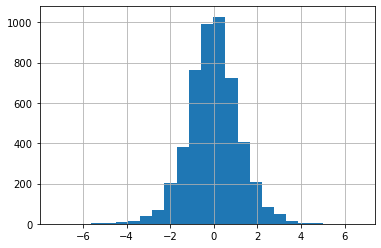

In [8]:
pd.Series(t).hist(bins=25)
pd.Series(t).describe()

In [9]:
samplet = np.random.standard_t(n, m)

count    5000.000000
mean        0.022000
std         1.185930
min        -7.038098
25%        -0.720017
50%         0.014369
75%         0.736370
max         6.707767
dtype: float64

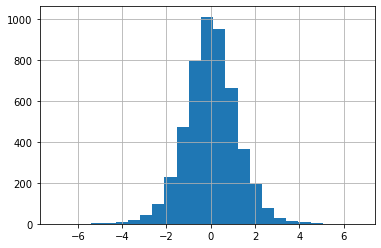

In [10]:
pd.Series(samplet).hist(bins=25)
pd.Series(samplet).describe()

### Punctual estimation

In [11]:
nterm = [587,470,676,451,436,672,584,697,408]

In [12]:
np.mean(nterm)

553.4444444444445

In [13]:
np.std(nterm,ddof=1)

114.09876326138587

In [14]:
np.std(nterm,ddof=1)/np.sqrt(len(nterm))

38.03292108712862

### Confidence interval for the mean, stdev unknown

In [15]:
nterm = [587,470,676,451,436,672,584,697,408]
n = 9
sigma = 100

In [16]:
np.mean(nterm) + scipy.stats.norm.ppf(0.975)*sigma/np.sqrt(n)

618.7765772624463

In [17]:
np.mean(nterm) + scipy.stats.t.ppf(0.975,8)*np.std(nterm,ddof=1)/np.sqrt(n)

641.1485177387609

In [18]:
scipy.stats.t.cdf(3,8)

0.9914641593831087

### Check that the quotient of two chi-square distributions divided by its degrees of freedom is a F distribution

In [19]:
m=5000 # samples of N(0,1)
n1=5   # degrees of freedom
n2=7 

In [20]:
samplechi2n1 = np.random.chisquare(n1,m)
samplechi2n2 = np.random.chisquare(n2,m)
f = (samplechi2n1 / n1) / (samplechi2n2 / n2)

count    5000.000000
mean        1.387932
std         1.500368
min         0.015112
25%         0.530307
50%         0.982594
75%         1.710182
max        23.871171
dtype: float64

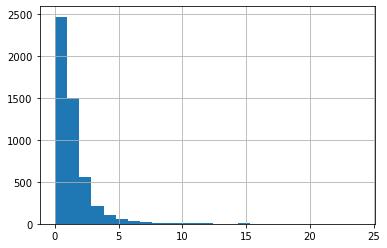

In [21]:
pd.Series(f).hist(bins=25)
pd.Series(f).describe()

count    5000.000000
mean        1.424662
std         1.532605
min         0.012164
25%         0.539307
50%         0.989867
75%         1.759003
max        21.189652
dtype: float64

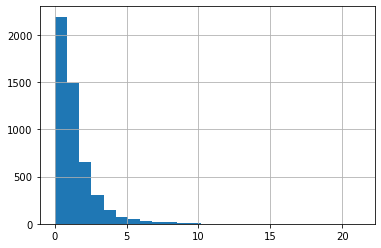

In [22]:
samplef = np.random.f(n1, n2, m)
pd.Series(samplef).hist(bins=25)
pd.Series(samplef).describe()

In [23]:
scipy.stats.f.ppf(0.99,10,5)

10.05101721957127

In [24]:
1-scipy.stats.f.cdf(10.05,10,5)

0.01000227680994581

In [25]:
scipy.stats.t.cdf(2.58,148)

0.9945733337151855